Classification is a very common and important variant among Machine Learning Problems. Many Machine Algorithms have been framed to tackle classification (discrete not continuous) problems. Examples of classification based predictive analytics problems are:

* Diabetic Retinopathy: Given a retinal image, classify the image (eye) as Diabetic or Non-Diabetic.
* Sentiment Analysis: Given a sentence, analyze the sense of the sentence (for ex. happiness/sadness, praise/insult, etc.)
* Digit Recognition: Given an image of a digit, recognize the digit (0–9). This is an example of Multi-Class Classification.

and many more...


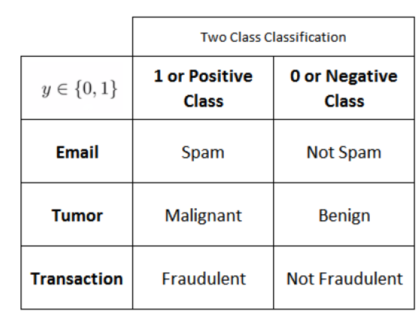

### Terminology related to classification

- Classifier: An algorithm that maps the input data to a specific category.
- Classification model: A classification model tries to draw some conclusion from the input values given for training. It will predict the class labels/categories for the new data.
- Feature: A feature is an individual measurable property of a phenomenon being observed.
- Binary Classification: Classification task with two possible outcomes. Eg: Gender classification (Male / Female)
- Multi class classification: Classification with more than two classes. In multi class classification each sample is assigned to one and only one target label. Eg: An animal can be cat or dog but not both at the same time
- Multi label classification: Classification task where each sample is mapped to a set of target labels (more than one class). Eg: A news article can be about sports, a person, and location at the same time.

# Logistic Regression

If you recall Linear Regression, it is used to determine the value of a continuous dependent variable. Logistic Regression is generally used for classification purposes. Unlike Linear Regression, the dependent variable can take a limited number of values only i.e, the dependent variable is categorical.

Despite being called a regression, logistic regression is actually a widely used supervised classification technique. Logistic regression and its extensions, like multinomial logistic regression, allow us to predict the probability that an observation is of a certain class using a straightforward and well-understood approach. 

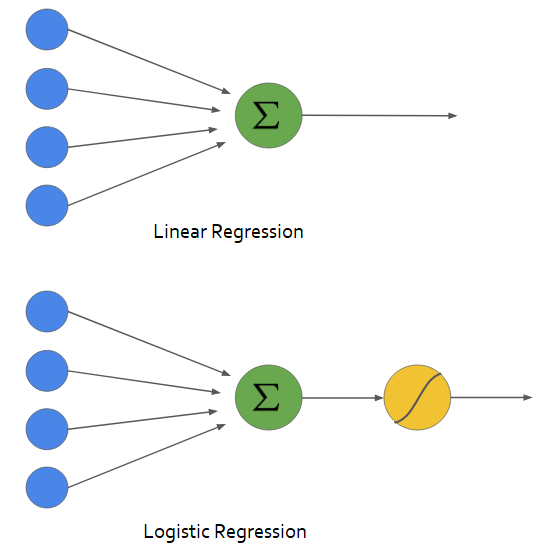

### Assumptions in logistic regression

There are some assumptions which need to be satisfied for having a logistic regression model which we can interpret meaningfully.

But let us look at some things which we no longer have to take care of in the case of logistic regression if we compare it with logistic regression.

* Logistic regression does NOT require a linear relationship between the dependent and independent variables
* The error terms (residuals) do NOT need to be normally distributed
* Homoscedasticity is NOT required
* The dependent variable in logistic regression is NOT measured on an interval or ratio scale

But then there are some assumptions which should hold

* Logistic regression requires the dependent variable to be categorical
* Logistic regression requires there to be little or no multicollinearity among the independent variables. This means that the independent variables should not be too highly correlated with each other.
* There should be a linear relationship between the link function (log(p/(1-p))and independent variables in the logit model.

# 1. Training a binary classifier

Despite having “regression” in its name, a logistic regression is actually a widely used binary classifier (i.e., the target vector can only take two values). In a logistic regression, a linear model (e.g., $\beta_0+\beta_1x$) is included in a logistic (also called sigmoid) function, $\frac{1}{1+e^{-z}}$, such that:
$$P(y_i = 1 | X) = \frac{1}{1+e^{-(\beta_0+\beta_1x)}} $$
where $P(y_i = 1 | X)$ is the probability of the ith observation’s target value, $y_i$, being class 1, X is the training data, $\beta_0$ and $\beta_1$ are the parameters to be learned, and e is Euler’s number. The effect of the logistic function is to constrain the value of the function’s
output to between 0 and 1 so that it can be interpreted as a probability. If $P(y_i = 1 | X)$
is greater than 0.5, class 1 is predicted; otherwise, class 0 is predicted.

In scikit-learn, we can learn a logistic regression model using LogisticRegression.

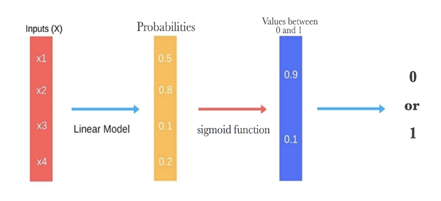

The sigmoid function (logistic function) looks like this:

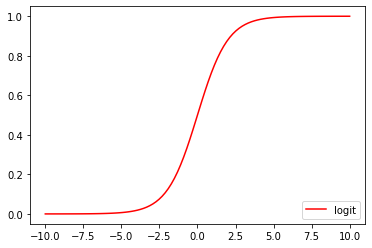

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

# Binary Classificaiton

In [1]:
from sklearn.datasets import load_breast_cancer

#load the breast cancer data and few EDA
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [2]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
print(cancer.target_names)

['malignant' 'benign']


In [4]:
import pandas as pd
df = pd.DataFrame(cancer.data)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.columns = cancer.feature_names

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
type(cancer.data)
cancer.data.shape

(569, 30)

In [9]:
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split


#----------------Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target,
                                                    random_state=42,train_size = 0.7)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred=log_reg.predict(X_test)


#print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
#print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

C:\Users\Arindam\Anaconda3\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head()

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,1


In [9]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 171 test samples is 10


In [12]:
161/171

0.9415204678362573

In [10]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 94.15204678362574


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [15]:
cancer = load_breast_cancer()

In [16]:
X = cancer.data

In [17]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [18]:
y = cancer.target

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size = 0.75 , random_state = 42)

In [21]:
dtc = DecisionTreeClassifier(random_state = 0)

In [22]:
dtc.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [23]:
y_pred = dtc.predict(X_test)

In [24]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(y_pred , y_test)

0.9300699300699301

### Confusion matrix

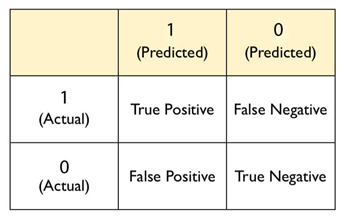

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=cancer.target_names,
                    columns=cancer.target_names)

cmdf

,malignant,benign
malignant,56,8
benign,2,105


### Precision – What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

Precision – Accuracy of positive predictions.

Precision = TP/(TP + FP)

In [13]:
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_pred)))

Precision score: 0.9292035398230089


### Recall – What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall: Fraction of positives that were correctly identified.

Recall = TP/(TP+FN)

In [14]:
from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(y_test,y_pred)))

Recall score: 0.9813084112149533


### F1 score – What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2 x (Recall x Precision) / (Recall + Precision)

In [32]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.9425287356321839


### Classification report

In [15]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

The classification report is as follows...

              precision    recall  f1-score   support

   malignant       0.97      0.88      0.92        64
      benign       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



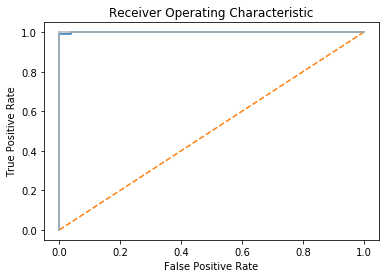

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
target_probabilities = log_reg.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,target_probabilities)

# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [35]:
# Calculate area under curve
#The closer the AUCROC is to 1, the better the model. 
roc_auc_score(y_test, target_probabilities)

0.9995838535164379

In [36]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn import linear_model

logreg = linear_model.LogisticRegression()

kfold = KFold(n_splits=5,random_state=7)

cv_results = cross_val_score(logreg, X_train,y_train, cv=kfold)
print (cv_results.mean()*100, "%")

94.35841313269493 %


C:\Users\Arindam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arindam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arindam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arindam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arindam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

# Models to Apply Data on 

# 1 - SVM - Support Vector Machine
# 2 - Naive Bayes Classification

In [56]:
def modeller(model , X_train , y_train , X_test , y_test):
    m = model
    m.fit(X_train , y_train)
    
    y_pred = m.predict(X_test)
    
    print(accuracy_score(y_test , y_pred))

In [62]:
from sklearn.svm import SVC

model = SVC(C=10.0, kernel='linear')
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test , y_pred)

0.965034965034965

In [54]:
list_1 = [DecisionTreeClassifier() , SVC() ]

In [57]:
for model_to_run in list_1:
    modeller(model_to_run , X_train ,y_train , X_test , y_test)

0.951048951048951
0.6223776223776224


/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# grid Search CV

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10,0.1,0.01]}
svc = svm.SVC()


clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)


/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/pranjal/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default va

In [ ]:
clf.best_params_

# Comparitive study

In [20]:
from sklearn.dummy import DummyClassifier

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

# Get accuracy score
dummy.score(X_test, y_test)

0.4755244755244755

To improve Logistic regression:
1) Try feature selection (and or) feature scaling as a preprocessing step and then build model
2) Try FCV and see the average accuracy

# B. Training a Multiclass Classifer

On their own, logistic regressions are only binary classifiers, meaning they cannot handle target vectors with more than two classes. However, two clever extensions to logistic regression do just that. 

First, in one-vs-rest logistic regression (OVR) a separate model is trained for each class predicted whether an observation belongs to that class or not (thus making it a binary classification problem). It assumes that each classification problem (e.g., class 0 or not) is independent.

Alternatively, in multinomial logistic regression (MLR) the logistic function is replaced with a softmax function:
$$ P(y_i = k | X) = \frac{e^{\beta_kx_i}}{\sum_{j=1}^{K}e^{\beta_jx_i}} $$
where $ P(y_i = k | X) $ is the probability of the ith observation’s target value, $y_i$, is class k, and K is the total number of classes. 

One practical advantage of the MLR is that its predicted probabilities using the predict_proba method are more reliable (i.e., better calibrated).

When using LogisticRegression we can select which of the two techniques we want, with OVR, *ovr*, being the default argument. We can switch to an MNL by setting the argument to multinomial.

In [21]:
# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.model_selection import train_test_split


# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, random_state=42)

#Create one-vs-rest logistic regression object
log_reg = LogisticRegression(random_state=0, multi_class="ovr") #multi_class='multinomial'

log_reg.fit(X_train, y_train)

y_pred=log_reg.predict(X_test)


In [22]:
import pandas as pd
df_predicted=pd.DataFrame()
df_predicted['Actual']=y_test
df_predicted['Predicted']=y_pred
df_predicted.head()

,Actual,Predicted
0,0,0
1,1,2
2,1,1
3,1,1
4,0,0


In [23]:
import numpy as np
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 38 test samples is 4


In [24]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of test set=",accuracy_score(y_test, y_pred)*100)

Accuracy of test set= 89.47368421052632


### Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=iris.target_names, columns=iris.target_names)
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,setosa,versicolor,virginica
setosa,12,0,0
versicolor,0,9,4
virginica,0,0,13


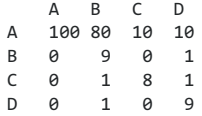

the precision for A would be

P(A) = 100/ 100 + 0 + 0 +0 = 100

P(B) = 9/ 9 + 80 + 1 + 1 = 9/91 psst... essentially take the true positive of the class and divide up by the column data across rows

recall for a would be

R(A) = 100/ 100+ 80+10+10 = 0.5

R(B) = 9 / 9+ 0+0+1 = 0.9

psst... essentially take the true positive of the class and divide up by the row data across columns

once you get all the values, take the macro average

avg(P) = P(A) + P(B) + P(C) + P(D) / 4

avg(R) = R(A) + R(B) + R(C) + R(D) / 4

F1 = 2 *avg(P) * avg(R) / avg(P) + avg(R)

# Comparitive study

In [26]:
from sklearn.dummy import DummyClassifier

# Create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "Train" model
dummy.fit(X_train, y_train)

# Get accuracy score
dummy.score(X_test, y_test)

0.23684210526315788

# Strengths

It is a widely used technique because it is very efficient, does not require too many computational resources, it’s highly interpretable, it doesn’t require input features to be scaled, it doesn’t require any tuning, it’s easy to regularize, and it outputs well-calibrated predicted probabilities.

Like linear regression, logistic regression does work better when you remove attributes that are unrelated to the output variable as well as attributes that are very similar (correlated) to each other. Therefore Feature Engineering plays an important role in regards to the performance of Logistic and also Linear Regression. Another advantage of Logistic Regression is that it is incredibly easy to implement and very efficient to train. I typically start with a Logistic Regression model as a benchmark and try using more complex algorithms from there on.

Because of its simplicity and the fact that it can be implemented relatively easy and quick, Logistic Regression is also a good baseline that you can use to measure the performance of other more complex Algorithms.

# Weakness

A disadvantage of it is that we can’t solve non-linear problems with logistic regression since it’s decision surface is linear. Just take a look at the example below that has 2 binary features from 2 examples.

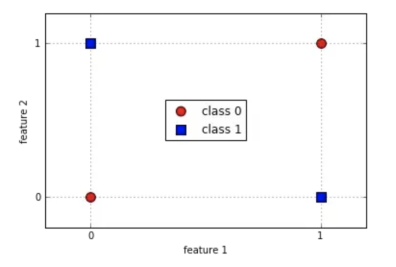

It is clearly visible that we can’t draw a line that separates these 2 classes without a huge error. To use a simple decision tree would be a much better choice.

Another disadvantage is its high reliance on a proper presentation of your data. This means that logistic regression is not a useful tool unless you have already identified all the important independent variables. Since its outcome is discrete, Logistic Regression can only predict a categorical outcome. It is also an Algorithm that is known for its vulnerability to overfitting.